# Logistic Regression (Hearing)


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [ ]:
# pip install matplotlib --upgrade

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/msddk/DS_Bootcamp/main/Machine%20Learning/Logistic%20Regression/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.00,40.70,1
1,50.00,37.20,1
2,52.00,24.70,0
3,56.00,31.00,0
4,35.00,42.90,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.00,51.61,11.29,18.00,43.00,51.00,60.00,90.00
physical_score,5000.00,32.76,8.17,-0.00,26.70,35.30,38.90,50.00
test_result,5000.00,0.60,0.49,0.00,0.00,1.00,1.00,1.00


In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

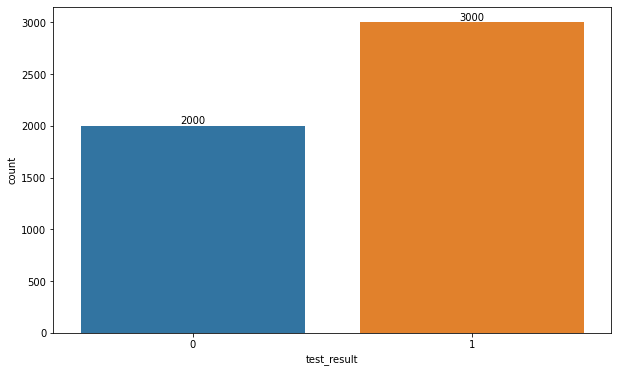

In [11]:
ax = sns.countplot(x='test_result', data=df)
ax.bar_label(ax.containers[0]);

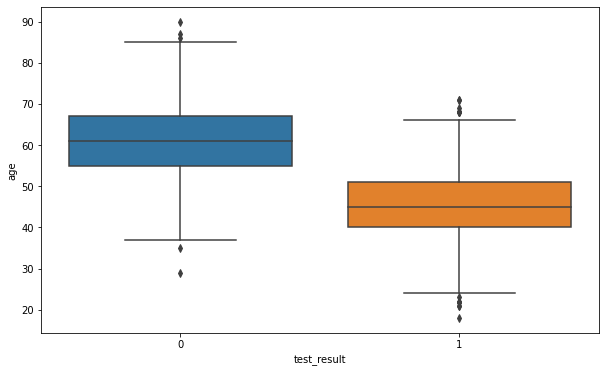

In [12]:
sns.boxplot(x='test_result',y='age',data=df);

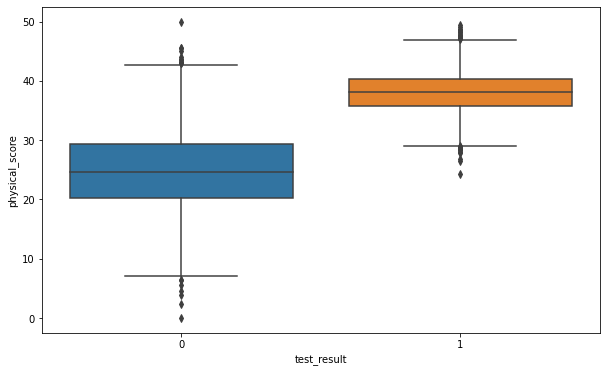

In [13]:
sns.boxplot(x='test_result',y='physical_score',data=df);

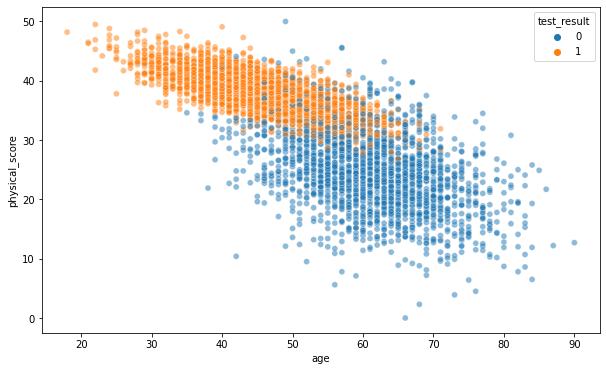

In [14]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5);

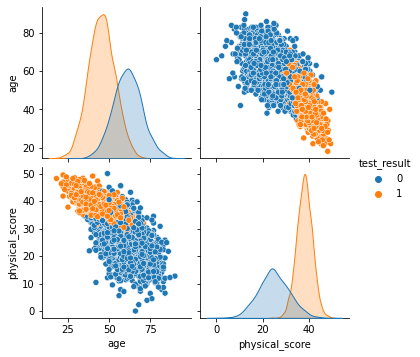

In [15]:
sns.pairplot(df,hue='test_result');

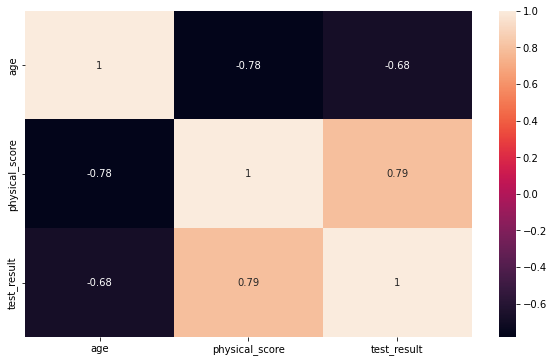

In [16]:
sns.heatmap(df.corr(), annot=True);

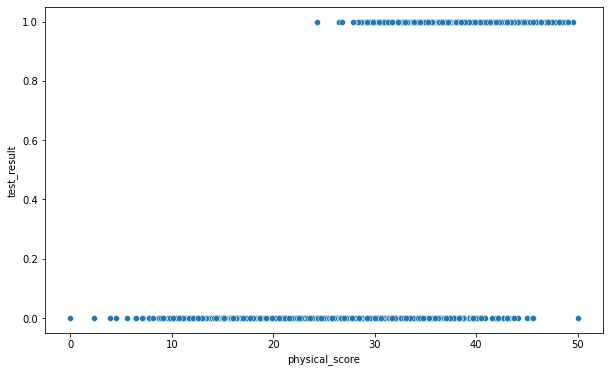

In [17]:
sns.scatterplot(x='physical_score',y='test_result',data=df);

## Train | Test Split and Scaling

In [18]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [30]:
from sklearn.linear_model import LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [31]:
#help(LogisticRegression)

In [32]:
log_model = LogisticRegression()

In [33]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [35]:
log_model.coef_

array([[-0.91841476,  3.52854047]])

In [36]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [37]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[3.85772024e-02, 9.61422798e-01],
       [9.76936888e-01, 2.30631119e-02],
       [3.34205902e-02, 9.66579410e-01],
       [3.96264761e-03, 9.96037352e-01],
       [9.16652351e-01, 8.33476488e-02],
       [7.44755915e-01, 2.55244085e-01],
       [9.98059804e-01, 1.94019559e-03],
       [1.50614978e-01, 8.49385022e-01],
       [1.85211035e-01, 8.14788965e-01],
       [9.96440162e-01, 3.55983801e-03],
       [3.95696792e-01, 6.04303208e-01],
       [9.69371989e-01, 3.06280111e-02],
       [2.63170279e-02, 9.73682972e-01],
       [6.66051036e-02, 9.33394896e-01],
       [1.68923145e-01, 8.31076855e-01],
       [9.99204565e-01, 7.95434551e-04],
       [9.60525122e-02, 9.03947488e-01],
       [9.29050085e-01, 7.09499154e-02],
       [3.37535133e-02, 9.66246487e-01],
       [6.40896997e-01, 3.59103003e-01],
       [6.02791501e-01, 3.97208499e-01],
       [9.70332257e-01, 2.96677429e-02],
       [9.73441753e-01, 2.65582472e-02],
       [2.41999369e-01, 7.58000631e-01],
       [5.237137

## `Pred_proba `

In [38]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,physical_score,test_result
1501,55.00,39.70,0
2586,59.00,24.30,0
2653,42.00,37.60,1
1055,35.00,41.30,1
705,53.00,26.30,0
...,...,...,...
3928,58.00,31.10,1
544,44.00,37.40,1
367,59.00,22.60,0
1612,46.00,42.10,1


In [ ]:
# y_pred_proba[:,1]

In [49]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,physical_score,test_result,pred_proba
1501,55.00,39.70,0,0.96
2586,59.00,24.30,0,0.02
2653,42.00,37.60,1,0.97
1055,35.00,41.30,1,1.00
705,53.00,26.30,0,0.08
...,...,...,...,...
3928,58.00,31.10,1,0.32
544,44.00,37.40,1,0.96
367,59.00,22.60,0,0.01
1612,46.00,42.10,1,0.99


In [ ]:
# y_pred

In [52]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1501,55.00,39.70,0,0.96,1
2586,59.00,24.30,0,0.02,0
2653,42.00,37.60,1,0.97,1
1055,35.00,41.30,1,1.00,1
705,53.00,26.30,0,0.08,0
...,...,...,...,...,...
3928,58.00,31.10,1,0.32,0
544,44.00,37.40,1,0.96,1
367,59.00,22.60,0,0.01,0
1612,46.00,42.10,1,0.99,1


In [54]:
test_data.sample(10)

,age,physical_score,test_result,pred_proba,pred
2357,66.00,31.00,1,0.19,0
3570,35.00,41.90,1,1.00,1
2642,55.00,28.50,0,0.17,0
2178,56.00,21.80,0,0.01,0
1491,53.00,26.10,0,0.08,0
2804,61.00,11.90,0,0.00,0
296,32.00,41.10,1,1.00,1
4139,56.00,19.00,0,0.00,0
2413,53.00,35.30,1,0.81,1
1096,51.00,20.50,0,0.01,0


## Model Performance on Classification Tasks

In [55]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [56]:
precision_score(y_test, y_pred)

0.906832298136646

In [57]:
recall_score(y_test, y_pred)

0.9449838187702265

In [58]:
accuracy_score(y_test,y_pred)

0.906

In [59]:
f1_score(y_test,y_pred)

0.9255150554675119

In [60]:
log_model.score(X_test_scaled, y_test)

0.906

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [62]:
confusion_matrix(y_test,y_pred)

array([[161,  30],
       [ 17, 292]])

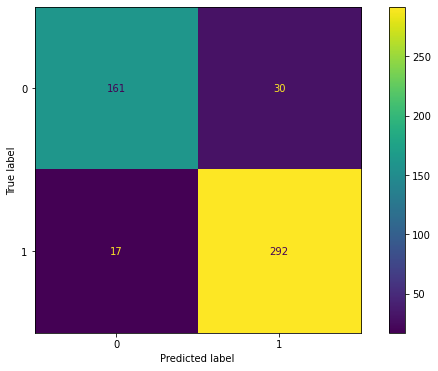

In [63]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

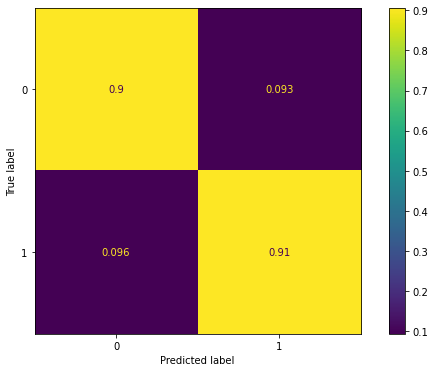

In [64]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       191
           1       0.91      0.94      0.93       309

    accuracy                           0.91       500
   macro avg       0.91      0.89      0.90       500
weighted avg       0.91      0.91      0.91       500



In [66]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1809
           1       0.92      0.95      0.93      2691

    accuracy                           0.92      4500
   macro avg       0.92      0.91      0.91      4500
weighted avg       0.92      0.92      0.92      4500



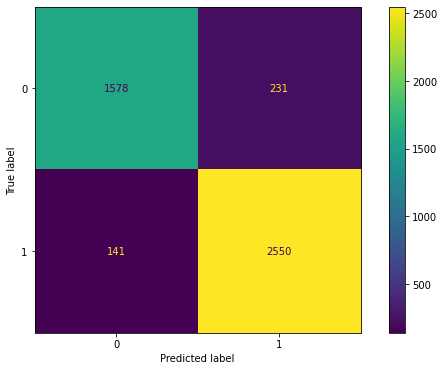

In [67]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

## Cross Validate

In [68]:
from sklearn.model_selection import cross_validate

In [69]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

In [73]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.iloc[:,2:]

,test_accuracy,test_precision,test_recall,test_f1
1,0.89,0.90,0.91,0.91
2,0.92,0.92,0.95,0.94
3,0.91,0.91,0.94,0.92
4,0.92,0.94,0.93,0.93
5,0.90,0.91,0.93,0.92
6,0.91,0.90,0.97,0.93
7,0.94,0.93,0.97,0.95
8,0.93,0.92,0.97,0.94
9,0.92,0.91,0.96,0.94
10,0.93,0.93,0.95,0.94


In [78]:
df_scores.mean()[2:]

test_accuracy    0.92
test_precision   0.92
test_recall      0.95
test_f1          0.93
dtype: float64

In [79]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       191
           1       0.91      0.94      0.93       309

    accuracy                           0.91       500
   macro avg       0.91      0.89      0.90       500
weighted avg       0.91      0.91      0.91       500

Train Set

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1809
           1       0.92      0.95      0.93      2691

    accuracy                           0.92      4500
   macro avg       0.92      0.91      0.91      4500
weighted avg       0.92      0.92      0.92      4500



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

Purpose of ROC Curve:
    1. Analysing the strength/predictive power of a classifier.
    2. Determining optimal threshold.
    3. Comparing two models (using Area Under the Curve).

AUC represents a degree or measure of separability. It tells us how much the model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting the probability of class YES higher than the probability of class NO.

The ROC Curve was first used during World War II for the analysis of radar signals. After the attack on Pearl Harbor, the US army began new research to improve the rate of detection of Japanese aircraft from their radar signals. Needless to say, they did not want to miss any of them. Neither did they wish to waste their resources on false alarms. They measured the ability of a radar receiver operator to make these predictions called the Receiver Operating Characteristic. That is the origin of the name. The purpose of the curve was similar to how we use it to improve our machine learning models now. The aim was to analyse the predictive power of the predictor in ensuring the detection of as many true positives as possible while minimizing false positives.

https://towardsdatascience.com/demystifying-roc-curves-df809474529a

In [80]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

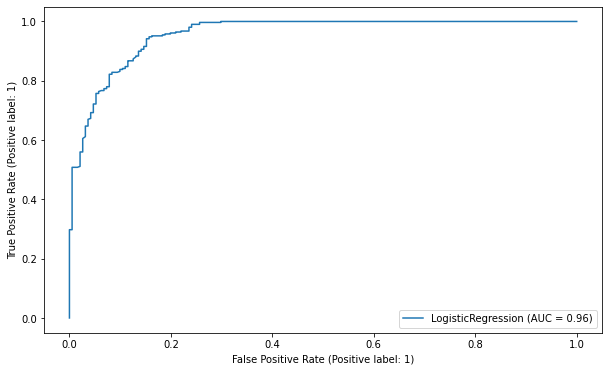

In [81]:
plot_roc_curve(log_model, X_test_scaled, y_test);

In [82]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9574204917060608

In [88]:
roc_auc_score(y_test, y_pred)

0.8939578779715005

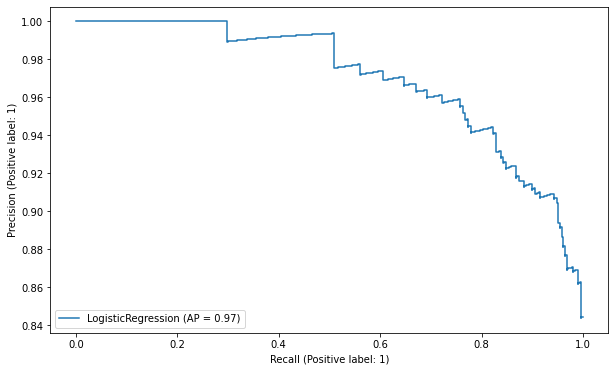

In [89]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

## <span style='color:red'> Final Model and Model Deployment</span> 

In [90]:
scaler = StandardScaler().fit(X)

In [91]:
import pickle
pickle.dump(scaler, open("scaler_hearing", 'wb'))

In [92]:
X_scaled = scaler.transform(X)

In [93]:
final_model = LogisticRegression().fit(X_scaled, y)

In [94]:
pickle.dump(final_model, open("final_model_hearing", 'wb'))

# Using the Model

In [95]:
my_dict = {"age": [20, 30, 40, 50, 60],
           "physical_score": [50, 30, 20, 10, 5]}

In [96]:
sample = pd.DataFrame(my_dict)
sample

,age,physical_score
0,20,50
1,30,30
2,40,20
3,50,10
4,60,5


In [97]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [98]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [99]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [100]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [101]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,age,physical_score,pred,pred_proba
0,20,50,1,1.00
1,30,30,1,0.73
2,40,20,0,0.02
3,50,10,0,0.00
4,60,5,0,0.00
